# Gastos publicos dos senadores brasileiros
# Brazilian senators' outgoing

In [1]:
import pandas as pd
import numpy as np


In [2]:

df = pd.read_csv('/home/pc/workspace/anaconda/files/senado_federal/ceap_2016.csv', encoding='ISO-8859-9',delimiter=',', low_memory=False, decimal=",")   

In [3]:
df.head(1)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.6


# As colunas mais significativas desse arquivo são:
* Ano
* Mês 
* Senador
* Valor de reembolso
* Tipo da despesa

## Vamos verificar se entre essas colunas temos dados faltando

### Criamos um dataframe secundario com apenas essas colunas

In [4]:
df_limpesa = pd.DataFrame(df, columns=['ANO', 'MES', 'SENADOR', 'VALOR_REEMBOLSADO', 'TIPO_DESPESA'])

### Verificamos se nesse dataframe temos campos nullos

In [5]:
pd.isnull(df_limpesa).any(1).nonzero()

(array([4822]),)

### Podemos verificar que a unica linha que possui valor invalido é a 4822
#### Vamos imprimi-la

In [6]:
df.loc[[4822]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
4822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Avaliando os dados pode-se verificar que há um alinha em branco


### Vamos remover essa linha no dataframe original
#### Vou usar a coluna mês como referencia

In [7]:
df = df.dropna(subset=['MES'], axis=0) 

### Validando a limpesa

In [8]:
df_limpesa = pd.DataFrame(df, columns=['ANO', 'MES', 'SENADOR', 'VALOR_REEMBOLSADO', 'TIPO_DESPESA'])
pd.isnull(df_limpesa).any(1).nonzero()

(array([], dtype=int64),)

### Procurando apenas na coluna MES do dataframe principal

In [9]:
 df['MES'].index[df['MES'].apply(np.isnan)]   

Int64Index([], dtype='int64')

# Agora que temos dataframe sem defeitos vamos formatar os campos



In [10]:
df.head(1)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016.0,1.0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.6


## Ano e mês como float... vamos transformá-los em inteiros

In [11]:
df.ANO = df.ANO.astype(int)
df.MES = df.MES.astype(int)
df.head(1)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.6


## E voi-là, vamos listar os tipos

In [12]:
df.dtypes

ANO                    int64
MES                    int64
SENADOR               object
TIPO_DESPESA          object
CNPJ_CPF              object
FORNECEDOR            object
DOCUMENTO             object
DATA                  object
DETALHAMENTO          object
VALOR_REEMBOLSADO    float64
dtype: object

# Vamos exibir o valor mais alto reembolsado

In [13]:
df.VALOR_REEMBOLSADO.idxmax()

6502

In [14]:
df.loc[[6502]]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6502,2016,5,GLEISI HOFFMANN,"Contratação de consultorias, assessorias, pesq...",04.453.641/0001-52,Datasonda Pesquisas Ltda,113,04/05/2016,Contratação de pesquisas para apoio ao mandato...,44500.0


## Ano e mês estão corretos, mas o campo DATA esta como Object, vamos transformálo em Date

In [15]:
pd.__version__

'0.19.2'

    cell_date = '13/01/2016'
from datetime import datetime
datetime.strptime(cell_date, '%d/%m/%Y').date().format('DD-MM-YYYY')

#lambda cell_date: datetime.strptime(cell_date, '%d/%m/%Y')


from datetime import date
date(cell_date, '%d/%m/%Y')

pd.to_datetime(df['DATA'], format='%d/%m/%Y')

df.DATA.apply(lambda cell_date: datetime.strptime(cell_date, '%d/%m/%Y').date())

# Limpesa de dados
# Data cleaning

In [16]:
df.describe()

,ANO,MES,VALOR_REEMBOLSADO
count,20445.0,20445.000000,20445.000000
mean,2016.0,5.170262,894.152074
std,0.0,2.505602,1873.505813
min,2016.0,1.000000,0.010000
25%,2016.0,3.000000,120.230000
50%,2016.0,5.000000,314.710000
75%,2016.0,7.000000,901.390000
max,2016.0,10.000000,44500.000000


# Dicionário que contém todos os nomes dos politicos sem repetição

In [17]:
gastos_senadores= {}
nome_senadores=df.SENADOR.unique()

In [18]:
nome_senadores[0:3]

array(['ACIR GURGACZ', 'AÉCIO NEVES', 'ALOYSIO NUNES FERREIRA'], dtype=object)

In [19]:
for nome in nome_senadores:
    serie_senador = df[df.SENADOR == nome]
    total_reembolso = serie_senador['VALOR_REEMBOLSADO'].sum()
    gastos_senadores[nome] = total_reembolso

df_reembolso_por_senador = pd.DataFrame.from_dict(gastos_senadores, orient='index')
df_reembolso_por_senador.columns = ['VALOR_REEMBOLSADO']


In [20]:
df_reembolso_por_senador.head(2)

,VALOR_REEMBOLSADO
ACIR GURGACZ,301970.88
AÉCIO NEVES,228739.66


# Ordenando em ordem decrescente por valor do reembolso

In [21]:
df_reembolso_por_senador = df_reembolso_por_senador.sort_values('VALOR_REEMBOLSADO', ascending=False)

# Tell to notebook print the chart inline

In [22]:
%matplotlib inline

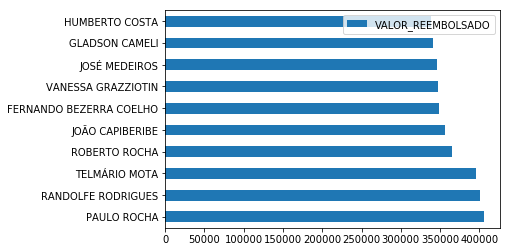

In [23]:

df_reembolso_por_senador.head(10).plot.barh()

# Vamos analisar os dados do Paulo Rocha que parece ser o senador com maior gasto

* Reset dos indexes

In [24]:
senador_maior_gasto = df[df['SENADOR'] == 'PAULO ROCHA'].reset_index()

* Contar quantos registros de reembolso Paulo Rocha teve no periodo

In [25]:
senador_maior_gasto.shape[0]

504

# Criando um dataFrame com os valores gastos pelo Paulo Rocha categorizados

In [26]:
def gastos_categorizado(senador):
    nome_senador = df[df.SENADOR == senador]
    nome_senador = nome_senador.groupby('TIPO_DESPESA')[['SENADOR', 'VALOR_REEMBOLSADO']].sum()
    return nome_senador


    
    
    

In [27]:
paulo_rocha= gastos_categorizado('PAULO ROCHA')
paulo_rocha.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

,VALOR_REEMBOLSADO
TIPO_DESPESA,
"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",163746.05
"Passagens aéreas, aquáticas e terrestres nacionais",134569.29
"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",94228.77
"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",5500.00
"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",4340.75
Divulgação da atividade parlamentar,3500.00


In [28]:
df.head(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,11327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,ACIR GURGACZ,Aquisição de material de consumo para uso no e...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550.00


# Vamos ver se existem monopólios estabelecidos

In [29]:
def monopolio():
    empresa = df.groupby(['CNPJ_CPF', 'TIPO_DESPESA'])[['TIPO_DESPESA', 'VALOR_REEMBOLSADO']].sum()
    return empresa

empresa = monopolio()


In [30]:
empresa.sort_values(by='VALOR_REEMBOLSADO' ,ascending=False)

,,VALOR_REEMBOLSADO
CNPJ_CPF,TIPO_DESPESA,
16.978.175/0001-08,"Passagens aéreas, aquáticas e terrestres nacionais",1169654.37
33.937.681/0001-78,"Passagens aéreas, aquáticas e terrestres nacionais",537585.11
07.575.651/0001-59,"Passagens aéreas, aquáticas e terrestres nacionais",479141.38
02.012.862/0001-60,"Passagens aéreas, aquáticas e terrestres nacionais",446861.18
02.575.829/0001-48,"Passagens aéreas, aquáticas e terrestres nacionais",284292.49
22.793.293/0001-44,"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",240000.00
04.850.792/0001-44,Serviços de Segurança Privada,231505.80
02.558.157/0001-62,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",224668.77
26.480.780/0001-08,"Passagens aéreas, aquáticas e terrestres nacionais",213453.36


In [31]:
empresa.head(3)

,,VALOR_REEMBOLSADO
CNPJ_CPF,TIPO_DESPESA,
00.000.166/0001-08,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",47765.1
00.001.388/0002-26,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",240.0
00.001.974/0001-90,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",90.0


In [32]:
tipo = df.groupby(by=['CNPJ_CPF'],sort=True)['TIPO_DESPESA'].count()


In [33]:
tipo.sort_values(axis=0,ascending=True)

CNPJ_CPF
10.463.471/0001-90       1
07.224.526/0001-02       1
07.222.565/0001-62       1
19.954.675/0001-06       1
07.216.175/0001-80       1
07.213.983/0001-93       1
07.209.299/0001-38       1
07.201.277/0001-21       1
19.955.346/0001-71       1
07.198.949/0001-97       1
19.990.585/0001-62       1
07.230.845/0001-12       1
07.193.864/0001-16       1
19.996.072/0001-69       1
07.187.563/0001-80       1
07.181.913/0001-09       1
20.007.676/0001-14       1
07.170.943/0069-08       1
20.087.404/0001-71       1
07.143.337/0001-05       1
07.141.852/0001-48       1
20.266.767/0001-74       1
07.130.954/0001-68       1
07.193.202/0001-46       1
07.233.544/0001-42       1
07.240.641/0005-96       1
07.240.641/0023-78       1
19.454.387/0001-84       1
19.480.246/0001-36       1
19.503.677/0001-70       1
                      ... 
11.812.366/0001-81      63
10.736.873/0001-10      68
24.929.614/0001-10      71
10.835.932/0001-08      71
00.306.597/0033-84      76
13.975.418/0001-66 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a1b6b0908>], dtype=object)

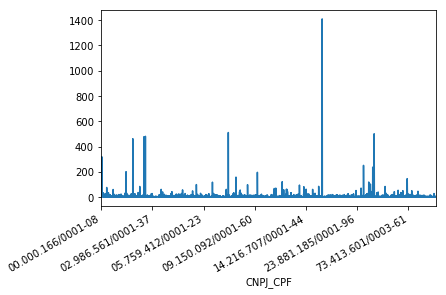

In [34]:
tipo.plot(subplots=True)

In [35]:
df.CNPJ_CPF[['16.978.175/0001-08']]

16.978.175/0001-08    NaN
Name: CNPJ_CPF, dtype: object

In [36]:
def reembolso_por_empresa(cnpj):
    cnpj = df[df.CNPJ_CPF == cnpj]    
    return cnpj

reembolso_por_empresa('16.978.175/0001-08')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
419,2016,2,ALOYSIO NUNES FERREIRA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ÁDRIA VIAGENS E TURISMO - GR,ZS6990,18/02/2016,"Companhia Aérea: AVIANCA, Localizador: ZS6990....",806.83
536,2016,5,ALOYSIO NUNES FERREIRA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ÁDRIA VIAGENS E TURISMO - GR,PCIVJY,25/05/2016,"Companhia Aérea: GOL, Localizador: PCIVJY. Pas...",1627.22
687,2016,9,ALOYSIO NUNES FERREIRA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,ÁDRIA VIAGENS E TURISMO - GR,3ODIB2,16/09/2016,"Companhia Aérea: LATAM, Localizador: 3UU5T3. P...",2491.67
698,2016,1,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00005981,22/12/2015,"Companhia Aérea: TAM, Localizador: 7VN2KN. Pas...",1454.73
699,2016,1,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00005981,22/12/2015,"Companhia Aérea: TAM, Localizador: 7VLK3S. Pas...",1888.25
700,2016,1,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00006058,11/01/2016,"Companhia Aérea: TAM, Localizador: 8NDM2T. Pas...",789.35
702,2016,2,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00006152,29/01/2016,"Companhia Aérea: TAM, Localizador: YS2PGJ. Pas...",1319.43
703,2016,2,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00006220,03/02/2016,"Companhia Aérea: TAM, Localizador: Y263DZ. Pas...",2196.25
704,2016,2,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00006229/6220,15/02/2016,"Companhia Aérea: TAM, Localizador: ZJIZ3G. Pas...",1027.86
705,2016,2,ALVARO DIAS,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Ádria Viagens e Turismo,FT00006229/6152,15/02/2016,"Companhia Aérea: TAM, Localizador: ZMHCWB. Pas...",1296.00


In [37]:
df[(df.VALOR_REEMBOLSADO > 1000)]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
2,2016,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
6,2016,1,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,570293,19/01/2016,Despesa com aquisição de combustível para abas...,1218.76
7,2016,1,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,570326,19/01/2016,Despesa com aquisição de combustível para abas...,1761.34
12,2016,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,NaN,14/01/2016,"Companhia Aérea: TAM, Localizador: 8SY8MN. Pas...",1276.43
13,2016,1,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,NaN,18/01/2016,"Companhia Aérea: TAM, Localizador: X29IR3. Pas...",1469.05
16,2016,2,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,002/16,03/02/2016,"Despesa com pagamento de aluguel, utilizado co...",6000.00
20,2016,2,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,574061,11/02/2016,Despesa com aquisição de combustível para abas...,1308.48
24,2016,2,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,577130,29/02/2016,Despesa com aquisição de combustível para abas...,1280.42
25,2016,2,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",17.872.428/0001-27,AMERICA VIAGENS E TURISMO LTDA - ME,YKLXQ8,01/02/2016,"Companhia Aérea: TAM, Localizador: YKLXQ8. Pas...",1655.00
27,2016,2,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",63.764.211/0001-10,TRANSCONTINENTAL AGÊNCIA DE VIAGENS LTDA,ZVJP8Q,22/02/2016,"Companhia Aérea: AVIANCA, Localizador: ZVJP8Q....",1134.54


# Quantas vezes cada senador pediu reembolso ligado a uma determinada empresa

In [54]:
qtd_empresa_senador = df.groupby(['CNPJ_CPF','SENADOR'])[['VALOR_REEMBOLSADO']].count().sort_values(by='VALOR_REEMBOLSADO', ascending=False )
qtd_empresa_senador_maior_que_um = qtd_empresa_senador['VALOR_REEMBOLSADO'] > 1

CNPJ_CPF            SENADOR                      
16.978.175/0001-08  LINDBERGH FARIAS                  True
01.595.271/0001-08  RONALDO CAIADO                    True
00.031.708/0001-00  WELLINGTON FAGUNDES               True
08.039.586/0001-00  RANDOLFE RODRIGUES                True
16.978.175/0001-08  JOSÉ MEDEIROS                     True
11.285.702/0001-85  WALDEMIR MOKA                     True
16.978.175/0001-08  ANTONIO ANASTASIA                 True
31.370.836/0001-01  ROSE DE FREITAS                   True
06.188.179/0001-39  FERNANDO BEZERRA COELHO           True
16.978.175/0001-08  HUMBERTO COSTA                    True
08.046.163/0001-17  JOÃO CAPIBERIBE                   True
16.978.175/0001-08  ALVARO DIAS                       True
08.843.726/0001-06  JOSÉ PIMENTEL                     True
02.575.829/0001-48  DÁRIO BERGER                      True
13.353.495/0001-84  EDUARDO AMORIM                    True
26.480.780/0001-08  JOÃO CAPIBERIBE                   True
00.031